In [1]:
# On recovering the second-order convergence of the lattice Boltzmann method with reaction-type source terms

# July 2021
# Grzegorz Gruszczyński, Michał Dzikowski, Łukasz Łaniewski-Wołłk
#
# <https://arxiv.org/abs/2107.03962>

from sympy import symbols, Eq, Matrix, solve, lambdify
import numpy as np
import matplotlib.pyplot as plt
from eq_solver import block_simpler, extract_real_solution
import os



## The Allen-Cahn equation --- illustrative advection-diffusion-reaction problem

In this example a solidification problem was selected in order to illustrate the impact of the non-linear dependence of the source term on the transported field. The problem is described by the Allen-Cahn equation,

\begin{align}
\frac{\partial \phi}{\partial t} + \nabla\cdot(\boldsymbol{u}\phi)  = \nabla \cdot (M \nabla \phi) + \underbrace{\lambda \phi \left(1-\phi^{2}\right)}_{Q=Q(\phi)}. \label{eq:Allen-Cahn_equation}
\end{align}


The variable being solved in a LBM scheme is $\boldsymbol{\tilde{c}}$.
The implicit relation (due to 'shift' of variables) is $\tilde{\phi} = \phi - \frac{1}{2} Q$.
Substituting the source term for the Allen-Cahn eq, we obtain:

\begin{align}
\tilde{\phi} &= \sum_i \tilde{h}_i = \phi - \dfrac{1}{2} Q(\phi) = \phi - \dfrac{1}{2}\lambda \phi \left(1-\phi^2\right) 
= \phi \left(1 - \dfrac{\lambda}{2} \left(1-\phi^2 \right)\right). \label{eq:binding_phi_and_tilde_phi}
\end{align}


In [2]:

str_phi = 'phi'  # non-shifted quantity
str_lambda = 'lambda'  # source term intensity
str_dt = 'dt'
str_tilde_phi = 'tilde_phi'  # shifted quantity
str_Q = 'Q'

phi = symbols(f'\\{str_phi}', real=True)  # non-shifted quantity
Lambda = symbols(f'\\{str_lambda}', real=True, positive=True, nonzero=True)
DT = symbols(f'\\{str_dt}', real=True, positive=True, nonzero=True)
tilde_phi = symbols(f'\\{str_tilde_phi}', real=True)

given = [tilde_phi]
unknown = [phi]
Q = [Lambda * phi * (1 - phi * phi)]

EQs = Eq(Matrix(given), Matrix(unknown) - DT*Matrix(Q)/2)
solutions = solve(EQs, unknown, dict=True)
symbolic_solutions_as_matrix = Matrix([list(s.values()) for s in solutions])
symbolic_solutions_as_matrix

inputs_as_symbols = [tilde_phi, Lambda, DT]
inputs_as_str = symbols([str_tilde_phi, str_lambda, str_dt])


##
# make plot to ensure that only real solutions are in the range of interest
calc_numerical_solution = lambdify(
    inputs_as_str, symbolic_solutions_as_matrix.subs(dict(zip(inputs_as_symbols, inputs_as_str))), modules="numpy")

calc_numerical_solution(2, 1, 0.5)  # tilde_phi, Lambda, dt
extract_real_solution(calc_numerical_solution, 2, 1, 0.5)


array([1.51274533])

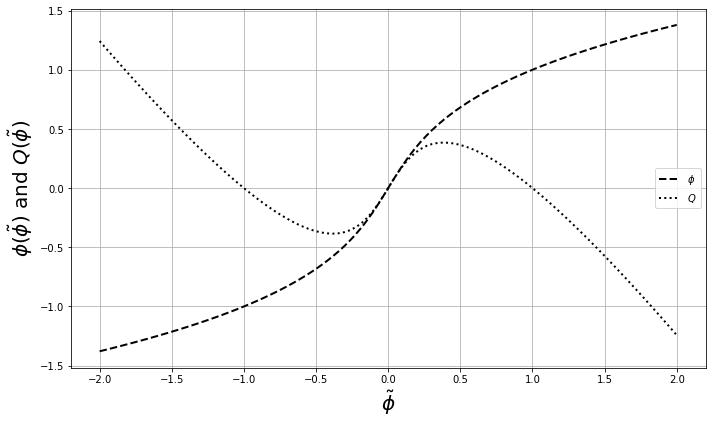

In [3]:

x = np.linspace(-2, 2, 100)
lambda_num = 1.
phi_num = np.vectorize(lambda t_: extract_real_solution(calc_numerical_solution, t_, lambda_num, 1))(x)
q_num = lambda_num * phi_num * (1 - phi_num*phi_num)

if not os.path.exists('plots'):
    os.makedirs('plots')
fig_name = f'plots/phi_and_Q_lambda_num{lambda_num}'

# -------------------- make dummy plot --------------------
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10, 6))

axes = plt.gca()
plt.plot(x, phi_num,
         color="black", marker="", markevery=1, markersize=15, linestyle="--", linewidth=2,
         label=r'$\phi$')

plt.plot(x, q_num,
         color="black", marker="", markevery=1, markersize=15, linestyle=":", linewidth=2,
         label=r'$Q$')

plt.xlabel(r'$\tilde{\phi}$', fontsize=20)
plt.ylabel(r'$\phi(\tilde{\phi})$ and $Q(\tilde{\phi})$', fontsize=20)
plt.legend()
plt.grid()
fig = plt.gcf()  # get current figure
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.pause(1e-9)  # there is a race condition somewhere in the matplotlib code.
fig.savefig(fig_name + '.pdf', bbox_inches='tight', dpi=200)
plt.show()


In [4]:
print("//=== THIS IS AUTOMATICALLY GENERATED CODE ===")
print(f'const real_t {str_dt} = 1.;')
print(f'real_t {str_phi};')
block_simpler([str_phi], [symbolic_solutions_as_matrix.subs(dict(zip(inputs_as_symbols, inputs_as_str)))[2]])


//=== THIS IS AUTOMATICALLY GENERATED CODE ===
const real_t dt = 1.;
real_t phi;
const real_t  x0 = cbrt(3.) ; // 2
const real_t  x1 = 1/(dt*lambda) ; // 2
const real_t  x2 = dt*lambda - 2 ; // 2
const real_t  x3 = cbrt(-9*tilde_phi*x1 + sqrt(3)*sqrt((27*pow(tilde_phi, 2) - x1*pow(x2, 3))/(pow(dt, 2)*pow(lambda, 2)))) ; // 19
phi = -1.0/3.0*x0*(x0*x1*x2 + pow(x3, 2))/x3 ; // 8


In [5]:
Q[0]

\lambda*\phi*(1 - \phi**2)

In [6]:
inputs_as_symbols.append(phi)
inputs_as_str.append(str_phi)

print(f'\nreal_t {str_Q};')
block_simpler([symbols("Q", real=True)], [Q[0].subs(dict(zip(inputs_as_symbols, inputs_as_str)))])


real_t Q;
Q = lambda*phi*(1 - pow(phi, 2)) ; // 4
